In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
df = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\Laptop_price_predictor\laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [8]:
# RAM 
df['Ram'] = df['Ram'].str.replace('GB','')
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [9]:
# Weight
df['Weight'] = df['Weight'].str.replace('kg','')
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [10]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<AxesSubplot:xlabel='Price', ylabel='Count'>

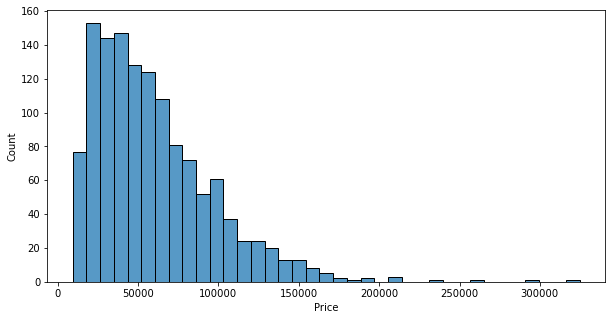

In [11]:
# Visualization
plt.figure(figsize=(10,5))
sb.histplot(data=df,x = 'Price')

<AxesSubplot:>

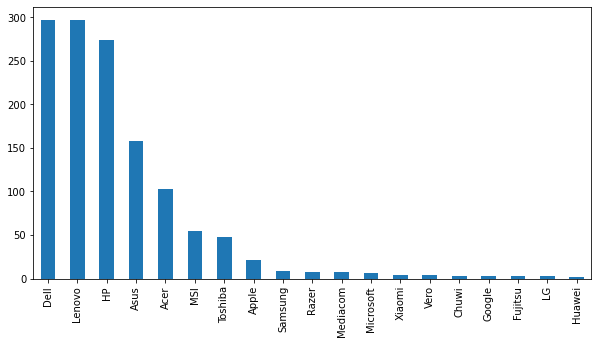

In [12]:
plt.figure(figsize=(10,5))
df['Company'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Company'>

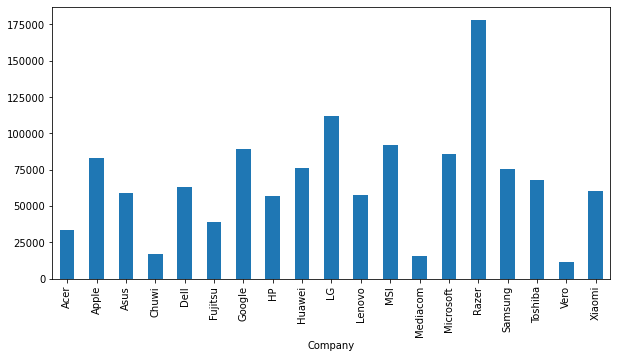

In [13]:
plt.figure(figsize=(10,5))
df.groupby('Company').mean()['Price'].plot(kind='bar')

<AxesSubplot:>

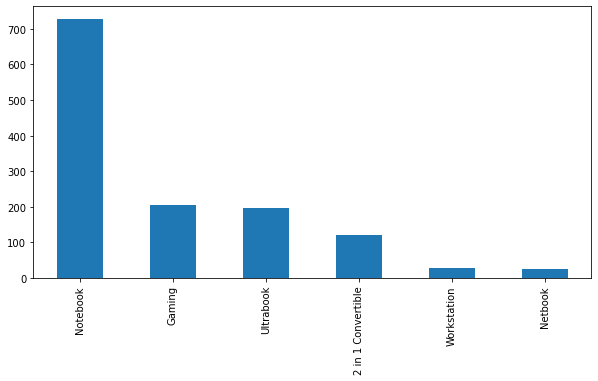

In [14]:
plt.figure(figsize=(10,5))
df['TypeName'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TypeName'>

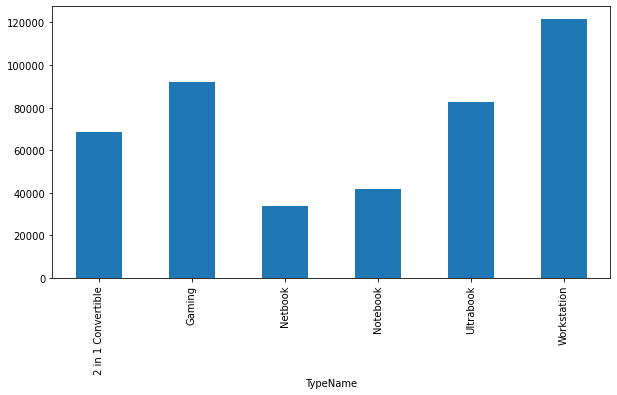

In [15]:
plt.figure(figsize=(10,5))
df.groupby('TypeName').mean()['Price'].plot(kind='bar')

<Figure size 720x360 with 0 Axes>

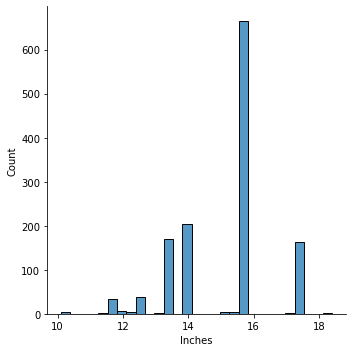

In [19]:
plt.figure(figsize=(10,5))
sb.displot(data=df,x='Inches')

In [22]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [25]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.12,1
417,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.43,79920.00,0
334,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.72,0


In [26]:
df['TouchScreen'].value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

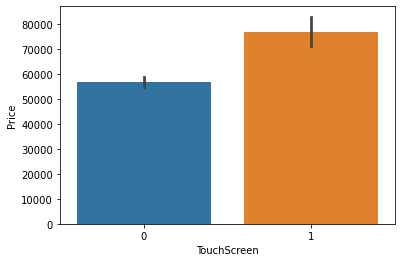

In [27]:
sb.barplot(data=df,x='TouchScreen', y='Price')

In [28]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
25,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0,0
989,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.60,59620.3200,0,0
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7200,1,0


<AxesSubplot:xlabel='IPS', ylabel='Price'>

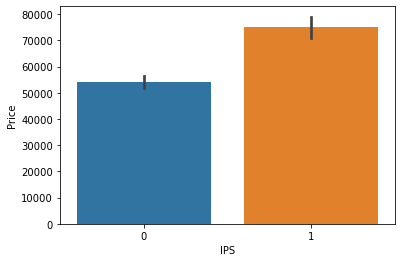

In [29]:
sb.barplot(data=df,x='IPS', y='Price')

In [30]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

In [36]:
temp_df = df['ScreenResolution'].str.split('x',expand=True)

In [39]:
import re

In [41]:
temp_df[0] = temp_df[0].apply(lambda x:re.sub('[^0-9]',"",x) )

In [43]:
df['X_Resolution'] = temp_df[0]
df['Y_Resolution'] = temp_df[1]
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_Resolution,Y_Resolution
132,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,47099.5200,0,1,1920,1080
1096,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34035.2640,0,0,1920,1080
1091,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,18434.3472,0,0,1366,768


In [46]:
df['X_Resolution']=df['X_Resolution'].astype(int)
df['Y_Resolution']  = df['Y_Resolution'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Resolution      1303 non-null   int32  
 14  Y_Resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [49]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS             0.252208
X_Resolution    0.363806
Y_Resolution    0.552809
Name: Price, dtype: float64

In [50]:
df['PPI'] = ((df['X_Resolution']**2 + df['Y_Resolution']**2)**0.5)/df['Inches']
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS             0.252208
X_Resolution    0.363806
Y_Resolution    0.552809
PPI             0.351858
Name: Price, dtype: float64

In [17]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')